# Movie Industry Analysis for Microsoft Movie Studio Pt. 2

![title](images/istockphoto-1007557230-612x612.jpg)

### Author: <a href="https://www.linkedin.com/in/pcontreras97//">Patricio Contreras</a>

## Reading in and Understanding the Second TMDb Data

To answer the last two research questions in this project, we'll keep using the original TMDb dataset used in Part 1 and bring in another dataset from the same source:

In [1]:
# importing necessary Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading in new TMDb dataset
df_tmdb_movies = pd.read_csv("zippedData/tmdb.movies.csv.gz")
# using original TMDb dataset
df_tn_movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

The new TMDb data frame has movie data similar to the IMDb data frame in Part 1:

In [3]:
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


There should be 26,517 rows and 10 columns:

In [4]:
df_tmdb_movies.shape

(26517, 10)

In [5]:
# original TMDb data frame used in Part 1
df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
df_tn_movie_budgets.shape

(5782, 6)

Check to see if the new TMDb data frame has duplicate movies:

In [7]:
# is the number of duplicates 0?
df_tmdb_movies.duplicated(subset = ["title", "release_date"]).sum() == 0

False

Percentage of duplicate rows in the new TMDb data frame:

In [8]:
# number of duplicates / number of rows
df_tmdb_movies.duplicated(subset = ["title", "release_date"]).sum() / len(df_tmdb_movies)

0.038729871403250744

We already know the original TMDb data frame has no duplicates:

In [9]:
# the number of duplicates is 0
df_tn_movie_budgets.duplicated(subset = ["movie", "release_date"]).sum() == 0

True

Check if there's missing data in the data frames:

In [10]:
# percentage of missing rows per column
df_tmdb_movies.isna().sum() / len(df_tmdb_movies)

Unnamed: 0           0.0
genre_ids            0.0
id                   0.0
original_language    0.0
original_title       0.0
popularity           0.0
release_date         0.0
title                0.0
vote_average         0.0
vote_count           0.0
dtype: float64

In [11]:
# percentage of missing rows per column
df_tn_movie_budgets.isna().sum() / len(df_tn_movie_budgets)

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

## Cleaning the TMDb Data Frames

Since only approximately 4% of the rows in the new data frame are duplicates, we can get rid of them easily like we did before:

In [12]:
df_tmdb_movies = df_tmdb_movies[~(df_tmdb_movies.duplicated(subset = ["title", "release_date"]))]
# check the number of duplicates is 0
df_tmdb_movies.duplicated(subset = ["title", "release_date"]).sum() == 0

True

Let's get rid of unnecessary columns in both data frames like we did in the cleaning in Part 1:

In [13]:
df_tmdb_movies = df_tmdb_movies.drop(columns = ["Unnamed: 0", "genre_ids", "id",
                                                "original_title", "popularity"], 
                                     axis = 1)
df_tmdb_movies.head()

,original_language,release_date,title,vote_average,vote_count
0,en,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,2010-03-26,How to Train Your Dragon,7.7,7610
2,en,2010-05-07,Iron Man 2,6.8,12368
3,en,1995-11-22,Toy Story,7.9,10174
4,en,2010-07-16,Inception,8.3,22186


In [14]:
df_tmdb_movies.shape

(25490, 5)

Same cleanup for the original TMDb data frame as in Part 1:

In [15]:
# getting rid of unnecessary columns (TMDb)
df_tn_movie_budgets.drop(columns = ["id"], axis = 1,
                        inplace = True)

In [16]:
from Code import cleanup
# column names of columns I want to change data type
cols = ["production_budget", "domestic_gross", "worldwide_gross"]
for col in cols:
    # iterate thru columns and change the type
    df_tn_movie_budgets[col] = df_tn_movie_budgets[col].apply(cleanup.money_to_int)

In [17]:
# renaming TMDb columns
df_tn_movie_budgets.rename(columns = {"movie": "title"}, inplace = True)
df_tn_movie_budgets.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [18]:
df_tn_movie_budgets.shape

(5782, 5)

## Analysis on Foreign Language Films

In [19]:
# output top 10 films with lowest vote_count
df_tmdb_movies.sort_values("vote_count")[:10]

,original_language,release_date,title,vote_average,vote_count
12929,en,2014-09-26,Hole In The Wall,1.0,1
13339,en,2014-06-24,Dragula,9.0,1
13340,en,2014-11-01,SMH The Movie,9.0,1
13343,en,2014-07-01,"White, Blue and White",9.0,1
13344,fr,2014-11-25,Jean-Marc Parent - Torture,9.0,1
13345,en,2014-10-25,Malleus Maleficarum,9.0,1
13346,en,2014-03-08,Pity,9.0,1
13347,en,2014-01-18,The Lion’s Mouth Opens,9.0,1
13338,en,2014-12-03,Sean,9.0,1
13349,en,2014-05-26,Strictly Sacred: The Story of Girl Trouble,9.0,1


As can be seen by the sample from our data frame above, many films have an average rating of 10 but only 1 person voted!  This can skew our results a lot since we're interested in the `vote_average` column and a single vote doesn't really mean the movie is excellent.  To account for this, we'll say that an "acceptable" average rating should have at least 122 votes:

In [20]:
# only films with vote_count >= 122
df_temp = df_tmdb_movies[df_tmdb_movies["vote_count"] >= 122]
# output top 12 languages with lowest freq
df_temp["original_language"].value_counts().tail(12)

hu    3
uk    2
te    2
tr    2
ar    2
he    1
ta    1
et    1
nb    1
sr    1
th    1
fi    1
Name: original_language, dtype: int64

Now that that's remedied, we unfortunately face another problem.  Many languages have a very small number of movies in the dataset.  Regardless if we take the average or median, the small sample size will have adverse effects on our results.  To remedy this and have a decent sample size per language, we'll only focus on the languages that show up at least 20 times in our data frame:

In [21]:
# calculating how many times each language shows up in data frame
counts = df_temp["original_language"].value_counts()
# filtering df_temp so it only has the languages that show up >= 20
df_temp = df_temp[~df_temp["original_language"].isin(counts[counts < 20].index)]

In [22]:
# grouping by original_language and taking the median vote_average per lang
df_lang = df_temp.groupby("original_language")[["vote_average"]].median()
# rename column for easier interpretability
df_lang.rename(columns = {"vote_average": "Median Rating"}, inplace = True)
# sort the languages by Median Rating in descending order (output top 5)
df_lang = df_lang.sort_values("Median Rating", ascending = False)[:5]
df_lang

,Median Rating
original_language,
sv,7.55
ja,7.50
es,7.00
it,7.00
de,6.90


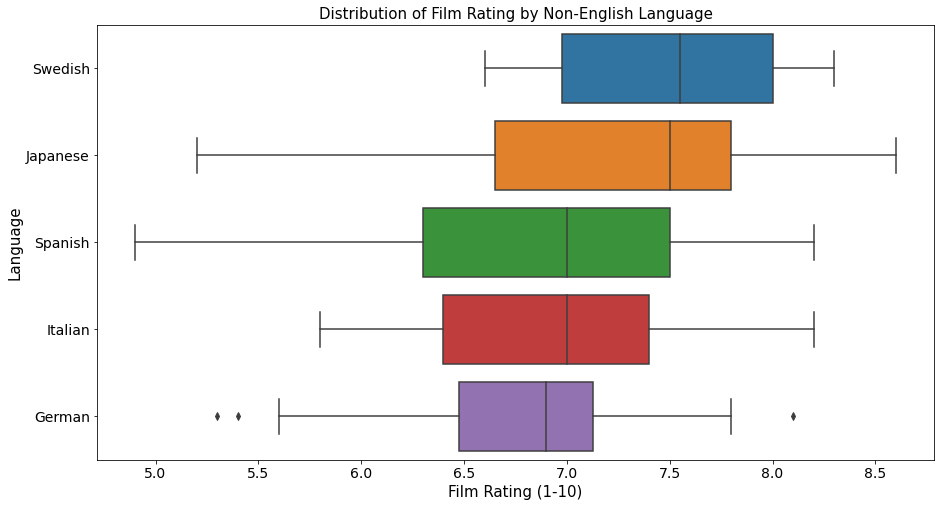

In [23]:
plt.figure(figsize = (15,8))
# order in descending order by the median movie rating
l = sns.boxplot(x = "vote_average", y = "original_language",
           data = df_temp, order = df_lang.index)
plt.title("Distribution of Film Rating by Non-English Language", 
          size = 15);
plt.xlabel("Film Rating (1-10)", size = 15);
plt.tick_params(labelsize = 14);
plt.ylabel("Language", size = 15);
# set these yticklabels instead of 'sv', 'ja', etc.
l.set_yticklabels(["Swedish", "Japanese", 
                   "Spanish", "Italian", "German"]);
plt.savefig("./images/lang_rating", dpi = 150, bbox_inches = "tight")

The distributions in the boxplot above are mostly negatively skewed with most medians landing just below a rating of 7.  The two non-English languages that are set apart from the rest are Swedish and Japanese, however, the Japanese film rating distribution has a lot of variation whereas the Swedish film rating distribution is more narrow.

After taking into account number of votes per film *and* number of films per language, the boxplot above suggests that if Microsoft seek to produce a non-English spoken film, they should opt for Swedish or Japanese. 

## Merging both TMDb Data Frames

To address the final research question in this project, we'll need to merge the two TMDb data frames.  This way we can have data on movie release date *and* domestic gross in the same data frame:

In [24]:
# changing the data type of release_date in each data frame to datetime
df_tn_movie_budgets["release_date"] = pd.to_datetime(df_tn_movie_budgets["release_date"])
df_tmdb_movies["release_date"] = pd.to_datetime(df_tmdb_movies["release_date"])

We'll join both data frames by `title` *and* `release_date` since those are the columns we've determined identify a unique film:

In [25]:
# inner join on title and release_date
df = df_tmdb_movies.merge(df_tn_movie_budgets, on = ["title", "release_date"])
df.head()

,original_language,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,en,2010-03-26,How to Train Your Dragon,7.7,7610,165000000,217581232,494870992
1,en,2010-05-07,Iron Man 2,6.8,12368,170000000,312433331,621156389
2,en,1995-11-22,Toy Story,7.9,10174,30000000,191796233,364545516
3,en,2010-07-16,Inception,8.3,22186,160000000,292576195,835524642
4,en,2009-12-18,Avatar,7.4,18676,425000000,760507625,2776345279


After performing the inner join, we're left with 1,270 rows and 8 columns:

In [26]:
df.shape

(1270, 8)

## Analysis on Film Release Date

This question is interested in knowing what time of the year is ideal to release a film.  Instead of using a time period such as days, weeks, or seasons, we'll focus on months:

In [27]:
# extract month from release_date
df["month"] = df["release_date"].dt.month
df.head()

,original_language,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,month
0,en,2010-03-26,How to Train Your Dragon,7.7,7610,165000000,217581232,494870992,3
1,en,2010-05-07,Iron Man 2,6.8,12368,170000000,312433331,621156389,5
2,en,1995-11-22,Toy Story,7.9,10174,30000000,191796233,364545516,11
3,en,2010-07-16,Inception,8.3,22186,160000000,292576195,835524642,7
4,en,2009-12-18,Avatar,7.4,18676,425000000,760507625,2776345279,12


Great.  Now that we've extracted the month from the `release_date` column, let's filter our data one last time and exclude non-English films.  The reason for this being:

* Microsoft will *most likely* produce films in English
* The grand majority of the films in our data frame have `original_language` as English

In [28]:
# create new data frame to include only en films
df_en = df[df["original_language"] == "en"]
# dimensions of this new data frame
df_en.shape

(1244, 9)

In [29]:
# group by month and calculate TOTAL domestic gross
df_month_gross = df_en.groupby("month")[["domestic_gross"]].sum()
# change index to actual months of the year
df_month_gross.index = ["January", "February", "March", "April", "May",
                  "June", "July", "August", "September", "October",
                  "November", "December"]
# rename column to reflect what it really is
df_month_gross.rename(columns = {"domestic_gross": "Total Domestic Gross"},
                 inplace = True)
df_month_gross

,Total Domestic Gross
January,2612936519
February,4953199587
March,6776770067
April,4761313760
May,7573311188
June,9123899220
July,8044057871
August,5145585510
September,4305629127
October,4282391004


In [30]:
df_month_rating = df_en.groupby("month")[["vote_average"]].mean()
# change index to actual months of the year
df_month_rating.index = ["January", "February", "March", "April", "May",
                  "June", "July", "August", "September", "October",
                  "November", "December"]
# rename column to reflect what it really is
df_month_rating.rename(columns = {"vote_average": "Average Rating"},
                 inplace = True)
df_month_rating

,Average Rating
January,5.883562
February,6.110588
March,6.135652
April,6.347423
May,6.201205
June,6.393939
July,6.265049
August,6.192982
September,6.267742
October,6.317910


The table and graph of Total Domestic Gross Box Office per month show us that the summer months (May, June, July) are extremely successful.  The end of the year months (November, December) are also as successful given the holiday season.

In addition to analysing domestic box office per month, an additional table and graph is displayed showing average film rating per month.  These inform us that the films with higher ratings are generally released at the end of the year.

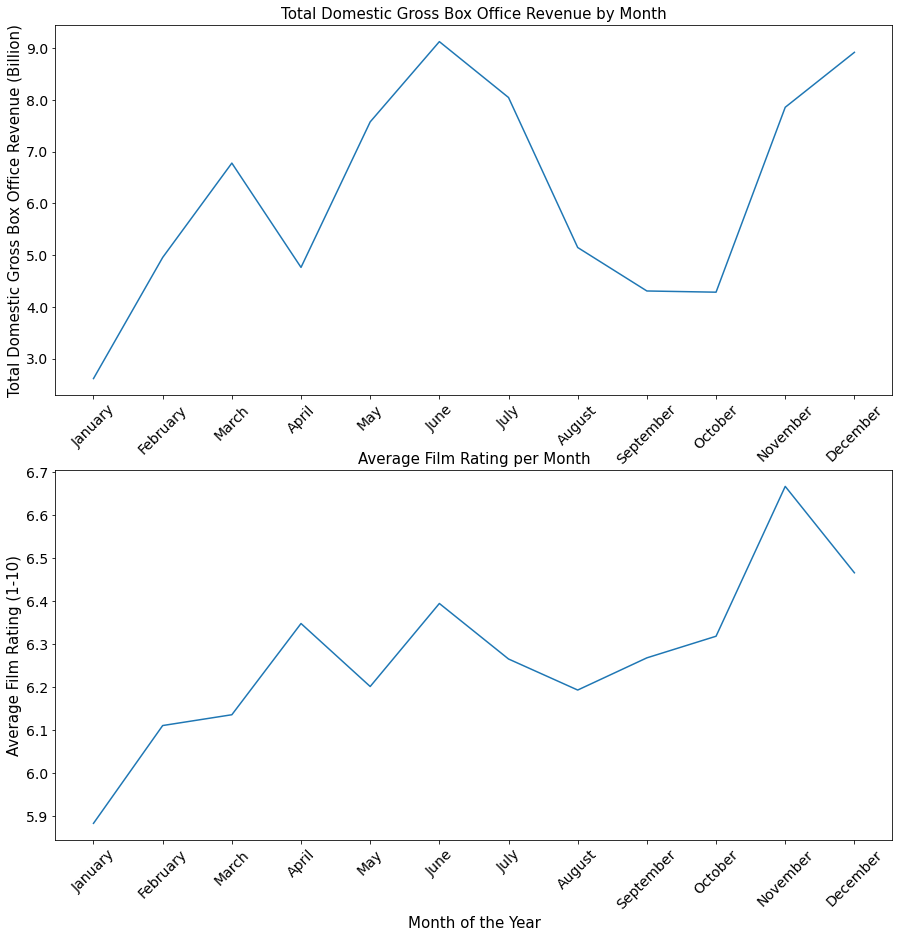

In [41]:
plt.figure(figsize = (15,15))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
d = sns.lineplot(x = df_month_gross.index, 
                 y = df_month_gross["Total Domestic Gross"]/1e9,
            sort = False, ax = ax1);
ax1.set_title("Total Domestic Gross Box Office Revenue by Month", size = 15);
ax1.set_xlabel("Month of the Year", size = 15);
ax1.set_ylabel("Total Domestic Gross Box Office Revenue (Billion)", size = 15);
d.set_yticklabels(d.get_yticks(), size = 14)
d.set_xticklabels(df_month_gross.index, size = 14, rotation = 45)
plt.xticks(rotation = 45);


sns.lineplot(x = df_month_rating.index, y = "Average Rating",
            data = df_month_rating, sort = False, ax = ax2);
plt.tick_params(labelsize = 14);
ax2.set_title("Average Film Rating per Month", size = 15);
ax2.set_xlabel("Month of the Year", size = 15);
ax2.set_ylabel("Average Film Rating (1-10)", size = 15);

plt.savefig("./images/month_gross.png", dpi = 150, bbox_inches = "tight")

## Conclusions

The analysis done for the newly-formed Microsoft Movie Studio has led us to recommend the following:

* **When deciding what type of film to produce, go with action, adventure, or drama.** These genres are the most profitable.
* **Partner up with Dreamworks or Disney to ensure great earnings.** These two movie studios stand out from the rest in terms of domestic gross box office revenue.
* **If producing a non-English film, go with Swedish or Japanese.** Films spoken in these two languages were rated higher than other languages, on average.
* **Release films in the summer (May, June, July) and end-of-the-year months (November, December) for the highest revenue.** If film rating is more important, release at the end of the year.

## Next Steps

* **Investigate the popular genres released per time of the year.** This analysis could inform Microsoft Movie Studio when to release what type of film.
* **Identify most prominent genres per movie studio.** This way, Microsoft Movie Studio could see which movie studio is best at a particular genre.
* **Analyse the relationship between film runtime and rating (or box office revenue).**  Performing this analysis can help Microsoft Movie Studio decide on an appropriate runtime for their films.